# Missing Data and Features Checks

The purpose of this notebook is to investigate the amount of missing data and to perform a high-level check of the values of the features. 

## 1. Missing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./Data/train')
m = df.shape[0]

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### a. Heatmap (to identify which features potentially have missing data issues)

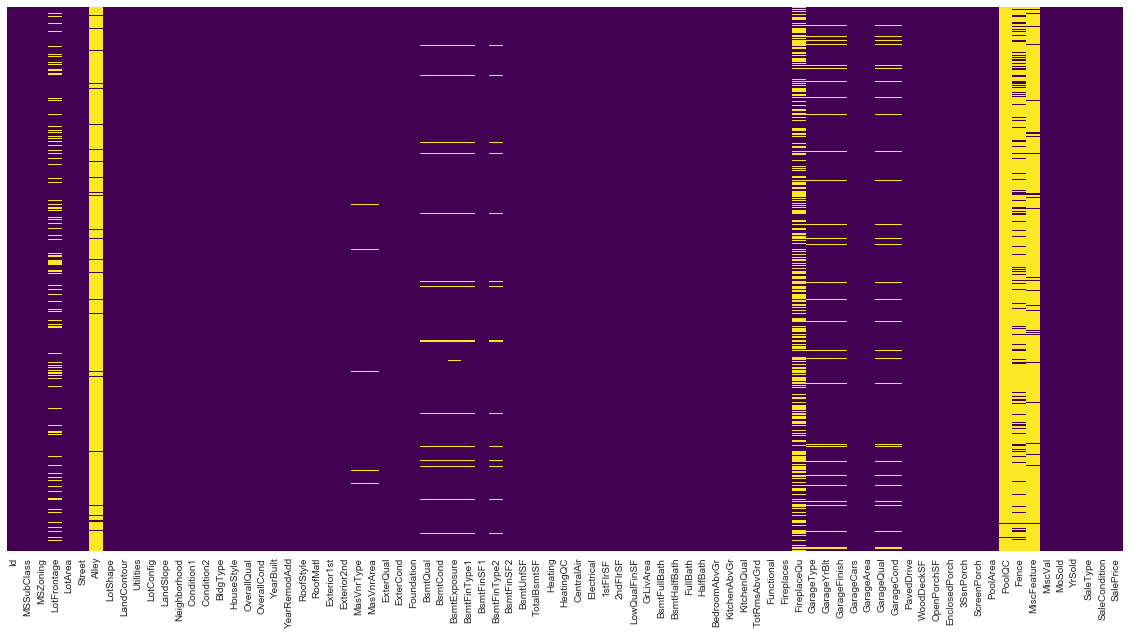

In [5]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

There are **18 features** with potential missing data issues:

**LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, and MiscFeature**

In [6]:
MList = ('LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
         'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
         'PoolQC', 'Fence', 'MiscFeature')

### b. Missing Data Percentage

In [7]:
for f in range(len(MList)):
    print(str(MList[f]) + ": " + str(round(100*(1-df[MList[f]].count()/m),1)) + "%")

LotFrontage: 17.7%
Alley: 93.8%
MasVnrType: 0.5%
MasVnrArea: 0.5%
BsmtQual: 2.5%
BsmtCond: 2.5%
BsmtExposure: 2.6%
BsmtFinType1: 2.5%
BsmtFinType2: 2.6%
FireplaceQu: 47.3%
GarageType: 5.5%
GarageYrBlt: 5.5%
GarageFinish: 5.5%
GarageQual: 5.5%
GarageCond: 5.5%
PoolQC: 99.5%
Fence: 80.8%
MiscFeature: 96.3%


## 2. Features Check

### a. Numerical Features

In [8]:
df.describe().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
pd.set_option('display.precision', 1)
print(df.describe(percentiles = [.5]).T)

                count     mean      std      min       50%       max
Id             1460.0  7.3e+02    421.6      1.0     730.5    1460.0
MSSubClass     1460.0  5.7e+01     42.3     20.0      50.0     190.0
LotFrontage    1201.0  7.0e+01     24.3     21.0      69.0     313.0
LotArea        1460.0  1.1e+04   9981.3   1300.0    9478.5  215245.0
OverallQual    1460.0  6.1e+00      1.4      1.0       6.0      10.0
OverallCond    1460.0  5.6e+00      1.1      1.0       5.0       9.0
YearBuilt      1460.0  2.0e+03     30.2   1872.0    1973.0    2010.0
YearRemodAdd   1460.0  2.0e+03     20.6   1950.0    1994.0    2010.0
MasVnrArea     1452.0  1.0e+02    181.1      0.0       0.0    1600.0
BsmtFinSF1     1460.0  4.4e+02    456.1      0.0     383.5    5644.0
BsmtFinSF2     1460.0  4.7e+01    161.3      0.0       0.0    1474.0
BsmtUnfSF      1460.0  5.7e+02    441.9      0.0     477.5    2336.0
TotalBsmtSF    1460.0  1.1e+03    438.7      0.0     991.5    6110.0
1stFlrSF       1460.0  1.2e+03    

### b. Non-numerical

In [10]:
cat = []
for c in list(df.columns):
    if c not in list(df.describe().columns):
        cat.append(c)
print(cat)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [11]:
for c in cat:
    print(100*df[c].value_counts()/m)
    print("-----------------------------")

RL         78.8
RM         14.9
FV          4.5
RH          1.1
C (all)     0.7
Name: MSZoning, dtype: float64
-----------------------------
Pave    99.6
Grvl     0.4
Name: Street, dtype: float64
-----------------------------
Grvl    3.4
Pave    2.8
Name: Alley, dtype: float64
-----------------------------
Reg    63.4
IR1    33.2
IR2     2.8
IR3     0.7
Name: LotShape, dtype: float64
-----------------------------
Lvl    89.8
Bnk     4.3
HLS     3.4
Low     2.5
Name: LandContour, dtype: float64
-----------------------------
AllPub    1.0e+02
NoSeWa    6.8e-02
Name: Utilities, dtype: float64
-----------------------------
Inside     72.1
Corner     18.0
CulDSac     6.4
FR2         3.2
FR3         0.3
Name: LotConfig, dtype: float64
-----------------------------
Gtl    94.7
Mod     4.5
Sev     0.9
Name: LandSlope, dtype: float64
-----------------------------
NAmes      15.4
CollgCr    10.3
OldTown     7.7
Edwards     6.8
Somerst     5.9
Gilbert     5.4
NridgHt     5.3
Sawyer      5.1
NWAme